# Classification model using Logistic Regression

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_binary_43_review.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,1,0.647155,-1.555300,-1.955019,-1.012432,-0.192863,1.471186,-1.012940,-1.984604,0.483530,...,-1.808111,-1.598462,0.785350,-1.041805,0.073726,-1.072343,-1.425669,-0.106774,-0.296542,-0.036078
1,1,0.672890,-0.482602,-0.401719,0.846203,0.161961,0.735780,-0.034285,0.301053,-0.310323,...,1.209088,-2.688085,0.798333,-0.441933,0.187126,0.098620,-1.725648,-0.172299,-0.479444,-0.884305
2,1,0.608535,0.113706,-1.292885,-0.338812,0.604200,1.032395,-0.566884,0.355974,0.887711,...,-0.648330,-3.009207,-0.047663,-1.440206,-1.344167,-1.294903,-0.910447,-0.821677,0.037457,-0.185145
3,0,0.454426,0.271049,-0.657329,-0.034799,0.437557,1.619529,-1.024691,0.075223,0.338540,...,0.611314,-3.861432,0.563050,-0.030812,-0.180186,-0.938214,-1.575309,-0.762886,-0.587954,-1.328248
4,1,0.466307,-1.383654,-1.946057,-1.142501,0.094552,-0.237099,-2.588735,0.177351,-0.109542,...,0.375221,-2.748083,-0.598856,-1.258993,1.250683,-1.328983,-1.023203,0.135820,-0.323808,-1.980627


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.647155 -1.555300 -1.955019 -1.012432 -0.192863  1.471186 -1.012940   
1    0.672890 -0.482602 -0.401719  0.846203  0.161961  0.735780 -0.034285   
2    0.608535  0.113706 -1.292885 -0.338812  0.604200  1.032395 -0.566884   
3    0.454426  0.271049 -0.657329 -0.034799  0.437557  1.619529 -1.024691   
4    0.466307 -1.383654 -1.946057 -1.142501  0.094552 -0.237099 -2.588735   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.310011 -0.179850 -1.012541 -0.571637  0.374212  1.562726 -0.988234   
177  0.621432  0.132928 -0.598305  0.810830  0.580382  0.185088 -0.805137   
178  0.250650 -0.275175 -0.762910 -0.778135  0.533026  1.283683 -0.809245   
179  0.249858 -0.317195 -0.227729 -0.806603  0.276945  0.922711 -0.215652   
180  0.169740  0.046074 -0.751110 -0.105990  0.496824  0.437686 -0.682648   

            7         8         9  ...        33        34        35  \
0  

### 3. Train-Test dataset split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=125, stratify=Y)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_train))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 144


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'C': [1,2,5,7,10],
            'max_iter':[1000000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10], 'max_iter': [1000000],
                         'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=1, max_iter=1000000, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5561576354679804


In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0
y_train=y_train.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0
y_test=y_test.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset:0.7638888888888888
Final accuracy on the testing dataset: 0.4864864864864865


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[51 17]
 [17 59]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1
 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1]


In [12]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        68
           1       0.78      0.78      0.78        76

    accuracy                           0.76       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.76      0.76      0.76       144



In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 7 10]
 [ 9 11]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0]


In [14]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.44      0.41      0.42        17
           1       0.52      0.55      0.54        20

    accuracy                           0.49        37
   macro avg       0.48      0.48      0.48        37
weighted avg       0.48      0.49      0.48        37



### 7. Results visualizaton

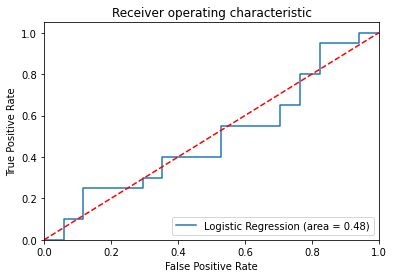

In [15]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()